## **Crypto price 🪙 visualization 📈 using historical [CoinMarketCap](https://coinmarketcap.com/) data**


[Bitcoin](https://coinmarketcap.com/currencies/bitcoin/) and [Ether](https://coinmarketcap.com/currencies/ethereum/) prices using historical data.

**Import all necessary library**

In [15]:
import pandas as pd # library for data manipulation
import matplotlib.pyplot as plt # library for visualization
import seaborn as sns # library for visualization
import datetime       # Load datetime
sns.set() # this command sets the seaborn chart style as the default

**Importing the data**

In [18]:
# btc historical prices
BTC_price = pd.read_csv("BTC_All_graph_coinmarketcap.csv", sep=";")
# eth historical prices
ETH_price = pd.read_csv("ETH_All_graph_coinmarketcap.csv", sep=";")

In [32]:
# converting the columns to timestamp
BTC_price['timestamp'] = pd.to_datetime(BTC_price['timestamp'], format='%Y-%m-%d')
ETH_price['timestamp'] = pd.to_datetime(ETH_price['timestamp'], format='%Y-%m-%d')

**Explore the first 5 rows of the dataset**

In [33]:
BTC_price.head()

,name,open,high,low,close,volume,marketCap,timestamp
0,2781,135.300003,147.488007,132.100006,139.000000,0.0,1.542813e+09,2013-04-01 00:00:00+00:00
1,2781,139.000000,139.889999,79.099998,129.000000,0.0,1.447870e+09,2013-05-01 00:00:00+00:00
2,2781,128.815002,129.779999,88.500000,96.613998,0.0,1.096958e+09,2013-06-01 00:00:00+00:00
3,2781,97.510002,111.344002,65.526001,106.089996,0.0,1.218778e+09,2013-07-01 00:00:00+00:00
4,2781,106.212997,140.889999,101.210999,135.350006,0.0,1.574672e+09,2013-08-01 00:00:00+00:00


In [34]:

ETH_price.head()

,name,open,high,low,close,volume,marketCap,timestamp
0,2781,1.353480,1.39274,0.557062,0.738644,619926.0,5.435147e+07,2015-09-01 00:00:00+00:00
1,2781,0.734307,1.34505,0.420897,0.916627,673892.0,6.816337e+07,2015-10-01 00:00:00+00:00
2,2781,0.920847,1.10642,0.725665,0.873119,784439.0,6.558956e+07,2015-11-01 00:00:00+00:00
3,2781,0.878316,1.04537,0.770488,0.933542,663994.0,7.085802e+07,2015-12-01 00:00:00+00:00
4,2781,0.933712,2.83699,0.929835,2.306040,5847500.0,1.768344e+08,2016-01-01 00:00:00+00:00


### **Bitcoin summary statistics and viz**

In [50]:
# summary statistics of the BTC's closing prices
BTC_price['close'].describe()

count      135.000000
mean     14964.802731
std      18626.852719
min         96.613998
25%        597.984985
50%       7193.598978
75%      24634.184249
max      71333.647926
Name: close, dtype: float64

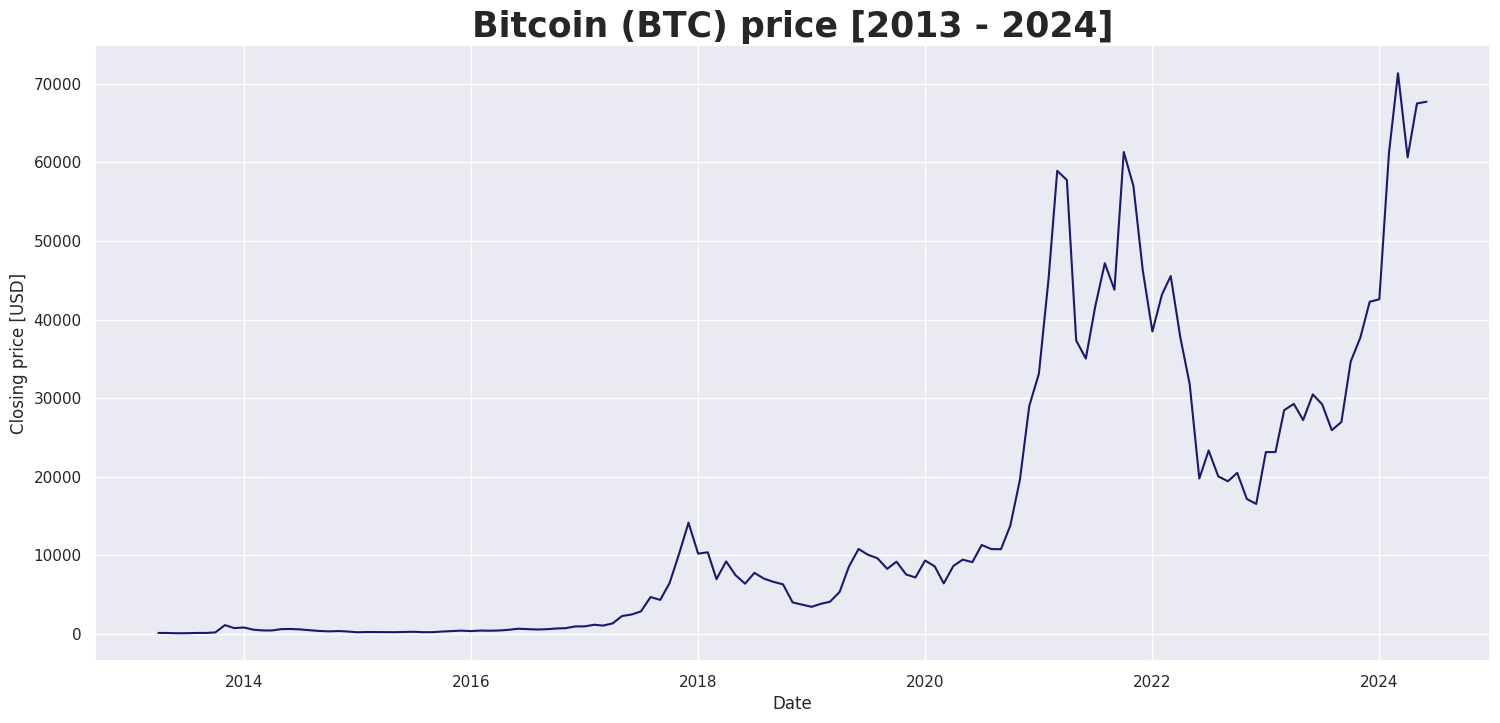

In [54]:
# line chart for BITCOIN 🪙
plt.figure(figsize = (18, 8))
plt.plot(BTC_price["timestamp"], BTC_price["close"], color = "midnightblue")
plt.title("Bitcoin (BTC) price [2013 - 2024]", fontsize = 25, fontweight = "bold")
plt.ylabel("Closing price [USD]")
plt.xlabel("Date")
plt.show()

### **ETHER summary statistics and viz**

In [49]:
# summary statistics of the ETH's closing prices
ETH_price['close'].describe()

count     106.000000
mean     1075.221091
std      1204.757527
min         0.738644
25%       144.270493
50%       399.550604
75%      1847.627284
max      4631.478795
Name: close, dtype: float64

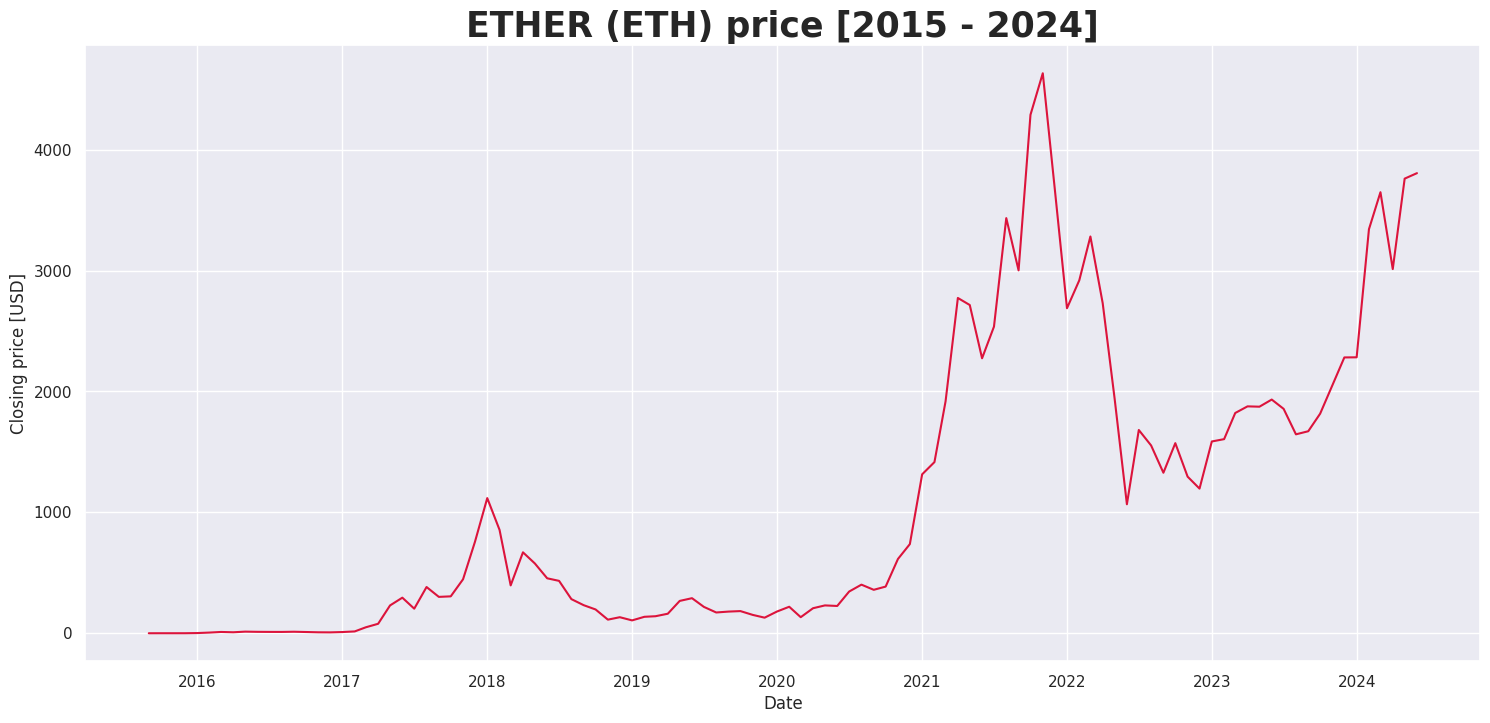

In [53]:
# line chart for ETHER 🪙
plt.figure(figsize = (18, 8))
plt.plot(ETH_price["timestamp"], ETH_price["close"], color = "crimson")
plt.title("ETHER (ETH) price [2015 - 2024]", fontsize = 25, fontweight = "bold")
plt.ylabel("Closing price [USD]")
plt.xlabel("Date")
plt.show()

### **Calculate simple returns for Bitcoin**

In [75]:
# formula to calculate the rate of return
BTC_price['simple_return'] = (BTC_price['close'] / BTC_price['close'].shift(1)) - 1
# show the first five rate of return
BTC_price.iloc[:,[7,4,8]].head()

,timestamp,close,simple_return
0,2013-04-01 00:00:00+00:00,139.000000,NaN
1,2013-05-01 00:00:00+00:00,129.000000,-0.071942
2,2013-06-01 00:00:00+00:00,96.613998,-0.251054
3,2013-07-01 00:00:00+00:00,106.089996,0.098081
4,2013-08-01 00:00:00+00:00,135.350006,0.275804


In [79]:
# summary statistics on the rate of returns
BTC_price['simple_return'].describe()

count    134.000000
mean       0.090537
std        0.446148
min       -0.377688
25%       -0.078465
50%        0.025972
75%        0.187680
max        4.536422
Name: simple_return, dtype: float64

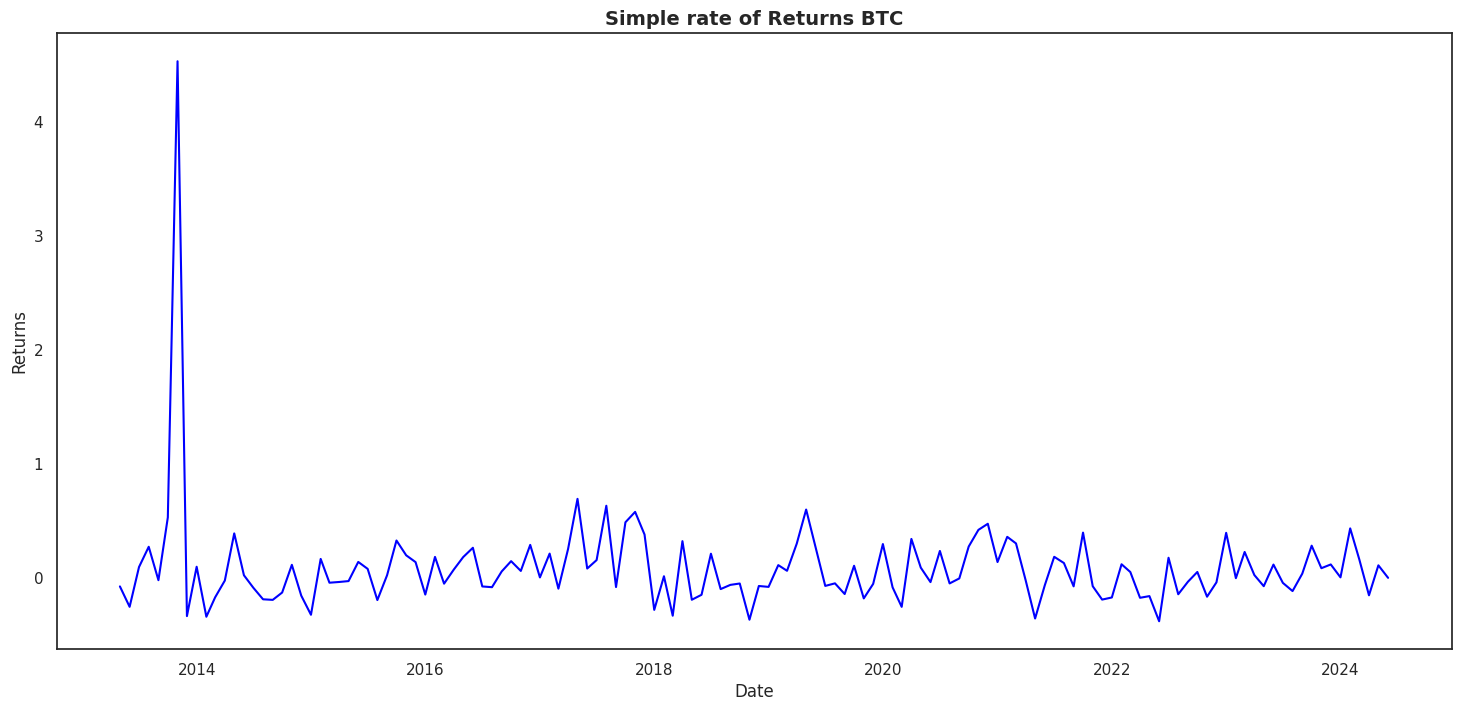

In [88]:
# visualize the rate of return
sns.set_style('white')
plt.figure(figsize = (18, 8))
plt.plot(BTC_price["timestamp"], BTC_price['simple_return'], color = "blue")
plt.title(f"Simple rate of Returns BTC", fontsize = 14, fontweight = "bold")
plt.ylabel("Returns")
plt.xlabel("Date")
plt.show()

### **Calculate simple returns for Ether**

In [80]:
# formula to calculate the rate of return
ETH_price['simple_return'] = (ETH_price['close'] / ETH_price['close'].shift(1)) - 1
# show the first five rate of return
ETH_price.iloc[:,[7,4,8]].head()

,timestamp,close,simple_return
0,2015-09-01 00:00:00+00:00,0.738644,NaN
1,2015-10-01 00:00:00+00:00,0.916627,0.240959
2,2015-11-01 00:00:00+00:00,0.873119,-0.047465
3,2015-12-01 00:00:00+00:00,0.933542,0.069204
4,2016-01-01 00:00:00+00:00,2.306040,1.470205


In [81]:
# summary statistics on the rate of returns
ETH_price['simple_return'].describe()

count    105.000000
mean       0.151544
std        0.450091
min       -0.536415
25%       -0.145272
50%        0.042920
75%        0.325680
max        2.163474
Name: simple_return, dtype: float64

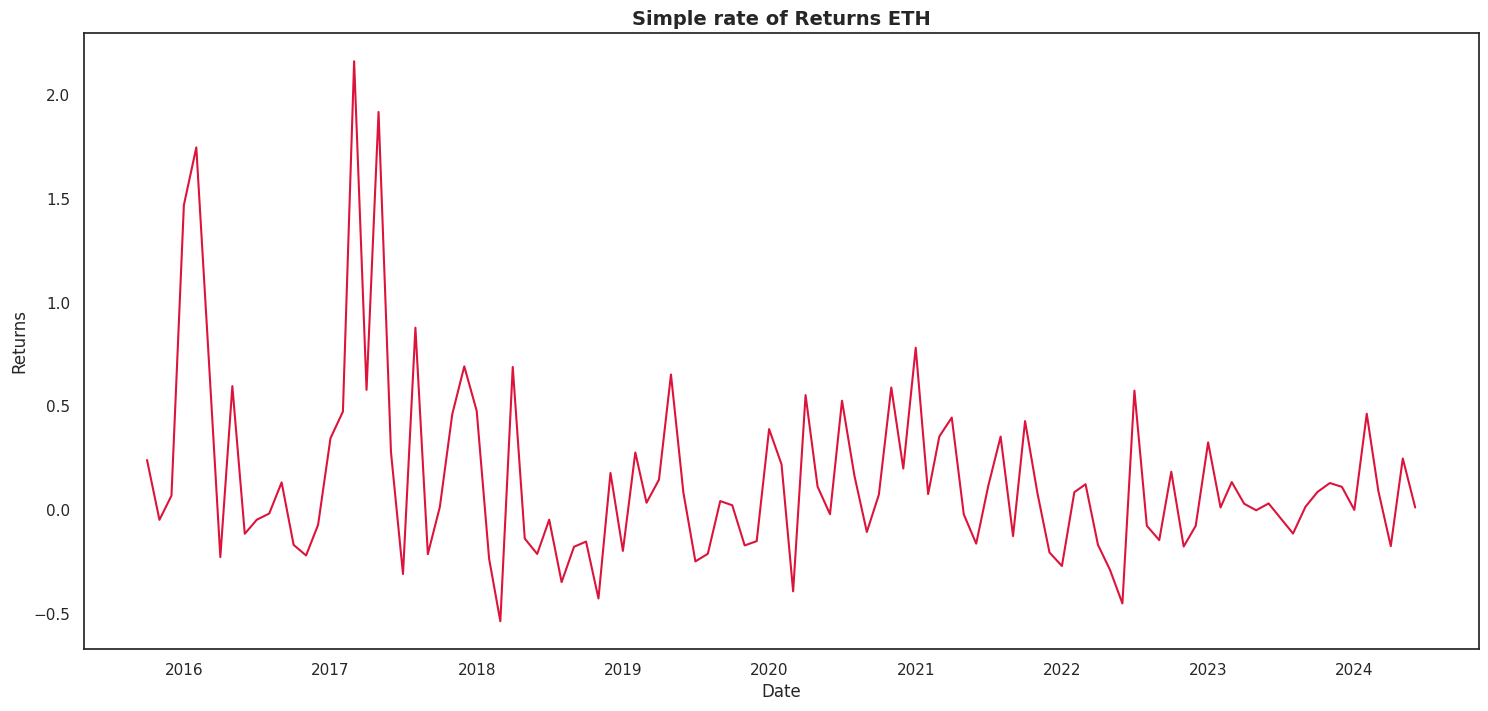

In [89]:
# visualize the rate of return
sns.set_style('white')
plt.figure(figsize = (18, 8))
plt.plot(ETH_price["timestamp"], ETH_price['simple_return'], color = "crimson")
plt.title(f"Simple rate of Returns ETH", fontsize = 14, fontweight = "bold")
plt.ylabel("Returns")
plt.xlabel("Date")
plt.show()